In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.stats import levy

In [2]:
def ctrw(psi,lamb):
  ###
  #psi : time distribution
  #lamb : step length distribution
  ###
  x = 0
  wating_time = 0
  jump_times = 0                    ### jump index
  trajectory = []
  for n,t in enumerate(Time):
    wating_time += dt
    
    if wating_time > psi[jump_times]: ## wating time == wating distribution -->>> jump
      x += lamb[jump_times]
      wating_time = 0.
      jump_times +=1
      
    trajectory.append(x)

  return np.array(trajectory)



def ctrw_harmonic(psi,lamb,k):
  ###
  #psi : time distribution
  #lamb : step length distribution
  # k : harmonic potential constant
  ####

  x = 0
  v = 0

  wating_time = 0
  jump_times = 0
  trajectory = []
  v_arr = []

  for n,t in enumerate(Time):
    wating_time += dt
    a = -k*x
    v += a*dt
    x += v*dt
    
    if wating_time > psi[jump_times]:
      x += lamb[jump_times]
      wating_time = 0.
      jump_times +=1
      
    trajectory.append(x)
    v_arr.append(v)

  return np.array(trajectory)

In [12]:
ens = 1000
n = 10000 # Maximum number of jumps
dt = 0.01 ## time interval
Tmax = 1000
Time = np.arange(0,Tmax,dt)

In [13]:
ave_X = np.zeros(len(Time))
ave_X_2 = np.zeros(len(Time))
Time_X = np.zeros(ens)
Time_X_2 = np.zeros(ens)

position = np.zeros((ens,len(Time)))

for en in range(ens):
  psi = levy.rvs(size=n) ### Levy distribution : a = 1/2  // b = 1
  lamb = np.random.normal(0.,1,size=(n)) # jump length distribution : Gaussian

  X = ctrw_harmonic(psi,lamb,0.0001)

  X_2 = X**2

  ave_X += X/ens
  ave_X_2 += X_2/ens

  Time_X[en] = np.sum(X)/len(Time)
  Time_X_2[en] = np.sum(X_2)/len(Time)

  position[en,:] = X

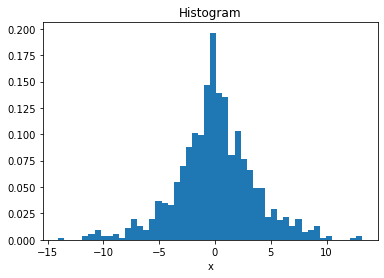

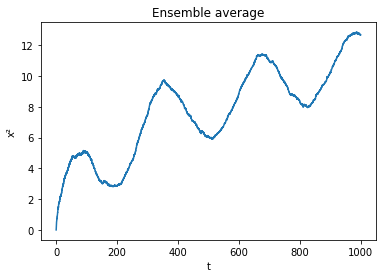

In [14]:
last_position = position[:,-1]
plt.title('Histogram')
plt.xlabel('x')
plt.hist(last_position,bins = 50,density = True)
plt.show()


plt.title('Ensemble average')
plt.ylabel('x²')
plt.xlabel('t')
plt.plot(Time,ave_X_2)
plt.show()

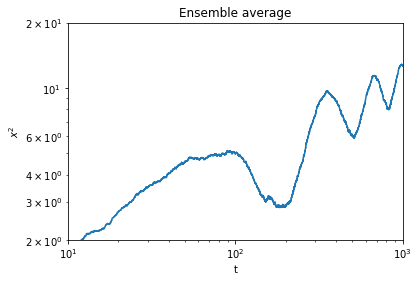

In [15]:
plt.title('Ensemble average')
plt.ylabel(r'$x^2$')
plt.xlabel('t')
plt.plot(Time,ave_X_2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(10,1000)
plt.ylim(2,20)
plt.show()

k =  0


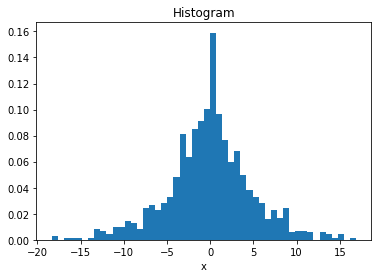

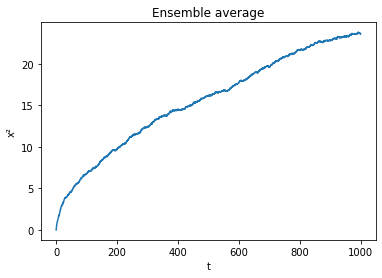

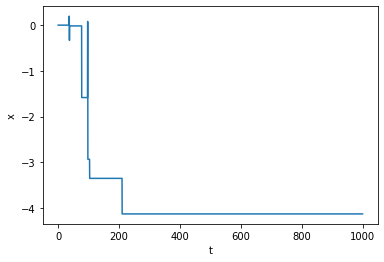

k =  1


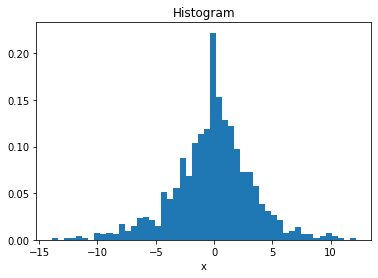

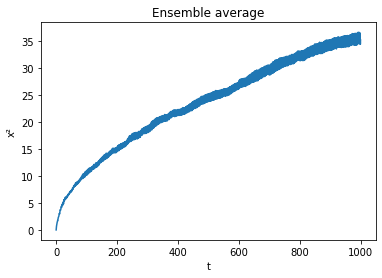

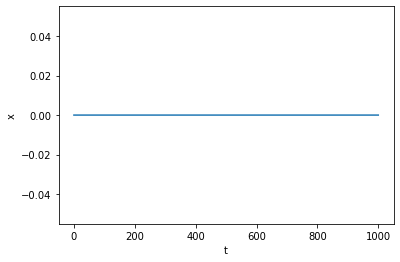

k =  2


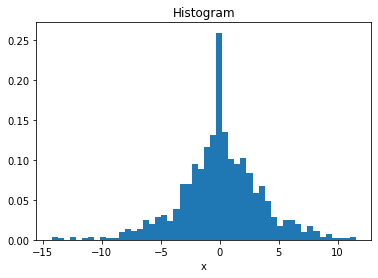

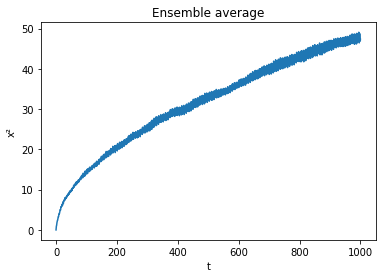

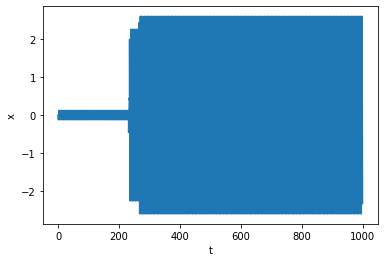

k =  3


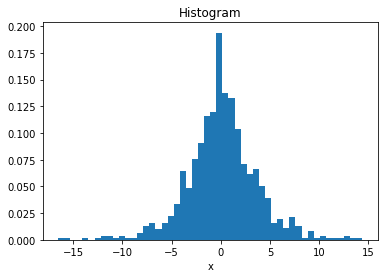

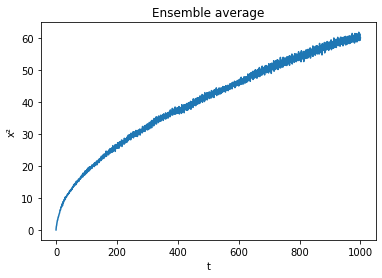

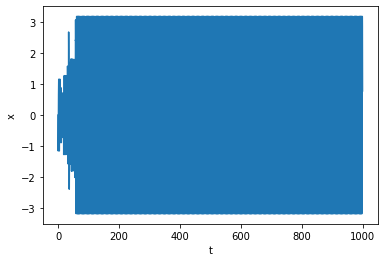

k =  4


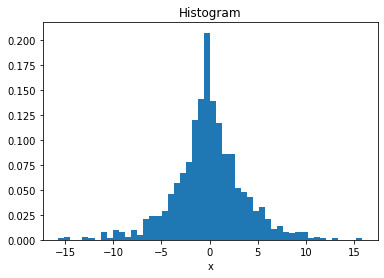

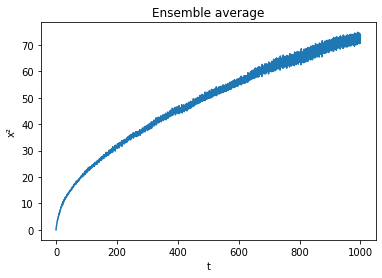

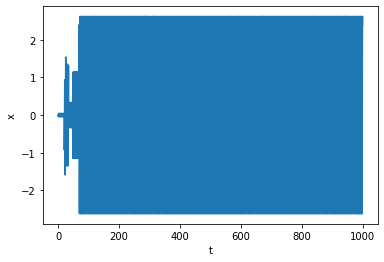

In [16]:
ens = 1000
n = 500 # Maximum number of jumps
dt = 0.1 ## time interval
Tmax = 1000
Time = np.arange(0,Tmax,dt)

ave_X = np.zeros(len(Time))
ave_X_2 = np.zeros(len(Time))
Time_X = np.zeros(ens)
Time_X_2 = np.zeros(ens)

position = np.zeros((ens,len(Time)))
for k in np.arange(0,5,1):
  for en in range(ens):
    psi = levy.rvs(size=n) ### Levy distribution : a = 1/2  // b = 1
    lamb = np.random.normal(0.,1,size=(n)) # jump length distribution : Gaussian

    X = ctrw_harmonic(psi,lamb,k)

    X_2 = X**2

    ave_X += X/ens
    ave_X_2 += X_2/ens

    Time_X[en] = np.sum(X)/len(Time)
    Time_X_2[en] = np.sum(X_2)/len(Time)

    position[en,:] = X
  print('k = ',k)

  last_position = position[:,-1]
  plt.title('Histogram')
  plt.xlabel('x')
  plt.hist(last_position,bins = 50,density = True)
  plt.show()


  plt.title('Ensemble average')
  plt.ylabel('x²')
  plt.xlabel('t')
  plt.plot(Time,ave_X_2)
  plt.show()

  plt.ylabel('x')
  plt.xlabel('t')
  plt.plot(Time,position[-1,:])
  plt.show()